# ID посылки - `293082955`

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def read_data(filename):
    sizes = []
    types = []
    times = []
    with open(filename, 'r') as f:
        for line in f:
            size, type, time = map(float, line.split())
            sizes.append(size)
            types.append(int(type))
            times.append(time)
    return np.array(sizes), np.array(types), np.array(times)

In [3]:
merge_sizes, merge_types, merge_times = read_data("./data/merge.txt")

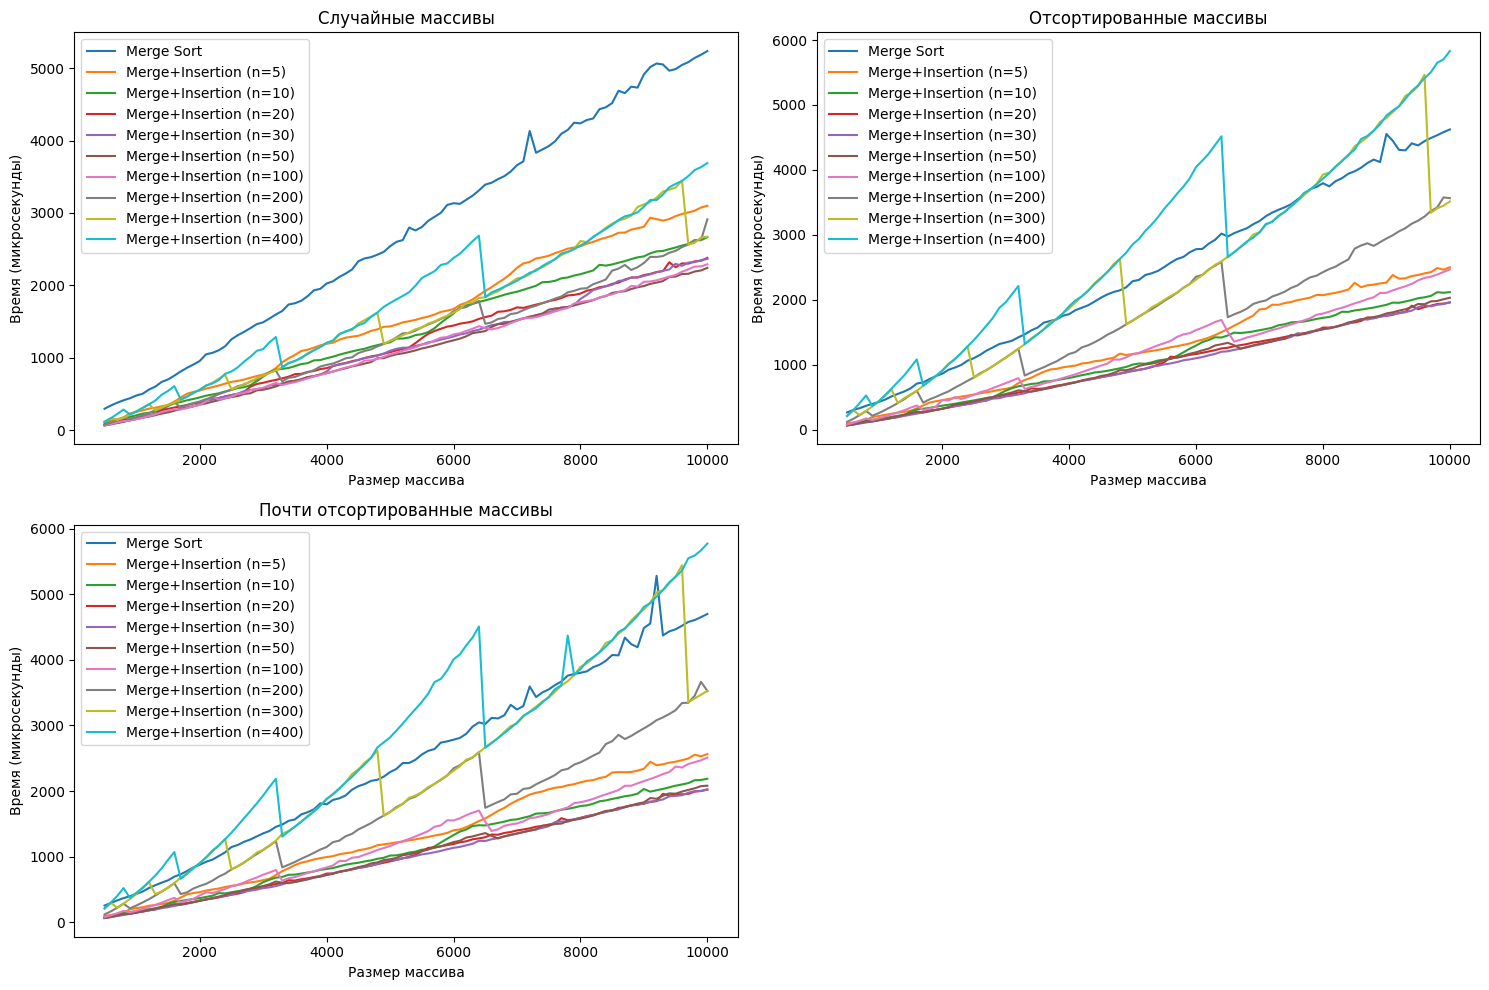

In [4]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(merge_sizes[merge_types == 0], merge_times[merge_types == 0], label="Merge Sort")
for i in [5, 10, 20, 30, 50, 100, 200, 300, 400]:
    hybrid_sizes, hybrid_types, hybrid_times = read_data(f'./data/m+i-{i}.txt') 
    plt.plot(hybrid_sizes[hybrid_types == 0], hybrid_times[hybrid_types == 0], label=f'Merge+Insertion (n={i})')
plt.title("Случайные массивы")
plt.xlabel("Размер массива")
plt.ylabel("Время (микросекунды)")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(merge_sizes[merge_types == 1], merge_times[merge_types == 1], label="Merge Sort")
for i in [5, 10, 20, 30, 50, 100, 200, 300, 400]:
    hybrid_sizes, hybrid_types, hybrid_times = read_data(f'./data/m+i-{i}.txt')
    plt.plot(hybrid_sizes[hybrid_types == 1], hybrid_times[hybrid_types == 1], label=f'Merge+Insertion (n={i})')
plt.title("Отсортированные массивы")
plt.xlabel("Размер массива")
plt.ylabel("Время (микросекунды)")
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(merge_sizes[merge_types == 2], merge_times[merge_types == 2], label="Merge Sort")
for i in [5, 10, 20, 30, 50, 100, 200, 300, 400]:
    hybrid_sizes, hybrid_types, hybrid_times = read_data(f'./data/m+i-{i}.txt')
    plt.plot(hybrid_sizes[hybrid_types == 2], hybrid_times[hybrid_types == 2], label=f'Merge+Insertion (n={i})')
plt.title("Почти отсортированные массивы")
plt.xlabel("Размер массива")
plt.ylabel("Время (микросекунды)")
plt.legend()

plt.tight_layout()
plt.show()

## Вывод


Графики демонстрируют зависимость времени работы сортировки слиянием от размера входного массива и типа данных (случайный, отсортированный, почти отсортированный). Кроме того, сравнивается чистая сортировка слиянием (Merge Sort) с гибридной сортировкой, комбинирующей сортировку слиянием и сортировку вставками (Merge+Insertion) с различными пороговыми значениями n (5, 10, 20, 30, 50, 100, 200, 300, 400).

### Случайные массивы

Гибридная сортировка показывает преимущество перед чистой сортировкой слиянием на малых размерах массивов (до ~10000 элементов). Оптимальное пороговое значение n лежит в диапазоне 30-50, обеспечивая примерно двукратное уменьшение времени выполнения. С ростом размера массива преимущество гибридного алгоритма сходит на нет, и кривые времени выполнения сближаются. Это объясняется тем, что при больших размерах доля работы, выполняемая сортировкой вставками, уменьшается, и основное время тратится на сортировку слиянием.

### Отсортированные массивы

Чистая сортировка слиянием работает быстрее гибридной при любых пороговых значениях. Дополнительные накладные расходы на переключение между алгоритмами в гибридном подходе не окупаются на уже отсортированных данных, где сортировка вставками не даёт выигрыша. Наблюдается незначительная деградация производительности гибридной сортировки при малых пороговых значениях.

### Почти отсортированные массивы

Гибридная сортировка демонстрирует наибольшее преимущество перед чистой сортировкой слиянием, аналогично случайным массивам, но с более выраженным выигрышем во времени. Это объясняется высокой эффективностью сортировки вставками на почти отсортированных данных. Оптимальное пороговое значение n также находится в диапазоне 5-50.

### Вывод вывода

Гибридная сортировка слиянием с вставками наиболее эффективна для случайных и почти отсортированных массивов, особенно небольших размеров. Оптимальное пороговое значение n зависит от характеристик данных и аппаратной платформы. Для уже отсортированных данных чистая сортировка слиянием показывает наилучшие результаты. При больших размерах массивов (более ~10000 элементов) выигрыш от использования гибридного алгоритма становится незначительным. В вашем случае, исходя из графиков, оптимальным пороговым значением является n около 30-50, что подтверждается экспериментальными данными с двукратным ускорением. Пределы эффективности гибридного алгоритма, с точки зрения порога n, ограничены значением ~310-350, после которого преимущество исчезает.